In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [38]:
class MyPCA:
    def __init__(self, n_components):
        self.n_components = n_components
        
    def fit(self, X):
        # Chuẩn hóa dữ liệu
        self.mean_ = np.mean(X, axis=0)
        self.std_ = np.std(X, axis=0) 
        Xnew = (X - self.mean_) / self.std_
        
        # Tính ma trận hiệp phương sai cho dữ liệu
        cov_matrix = np.dot(Xnew.T, Xnew) / (Xnew.shape[0] - 1)
        
        # Tính trị riêng và vector riêng cho ma trận hiệp phương sai
        eigen_values, eigen_vectors = np.linalg.eigh(cov_matrix) # luôn trả về số thực (eigh)
        sorted_indices = np.argsort(eigen_values)[::-1] # trả về index sắp xếp theo trị tiêng giảm dần
        
        # Sắp xếp lại các trị riêng và các vector riêng
        self.eigen_values = eigen_values[sorted_indices]
        self.eigen_vectors = eigen_vectors[:, sorted_indices]
        
        # Các thành phần chính (n_components)
        self.selected_eigen_vectors = self.eigen_vectors[:, :self.n_components]
        
        # Tổng phương sai của dữ liệu
        total_var = self.eigen_values.sum()
        
        # EVR: Tỉ lệ phương sai được nắm giữ bởi các thành phần PCA
        self.explained_variance_ratio_ = self.eigen_values[:self.n_components] / total_var
        
        # CEVR: Tổng tích lũy tỉ lệ phương sai được nắm giữ bởi các thành phần PCA
        self.cumulative_explained_variance_ratio_ = np.cumsum(self.explained_variance_ratio_)
        
    def transform(self, X):
        Xnew = (X - self.mean_) / self.std_
        # Chiếu dữ liệu X lên các thành phần chính
        return np.dot(Xnew, self.selected_eigen_vectors)

In [39]:
from sklearn.datasets import load_iris
iris = load_iris()
X = pd.DataFrame(data=iris.data, columns=iris.feature_names)
y = iris.target

Data của file là $X \in R^{n \times d}$: <br>
$\hspace{1cm}\bullet \hspace{0.5cm} n $ (số hàng) là số lượng sample của dataset. <br>
$\hspace{1cm}\bullet \hspace{0.5cm} d $ (số cột) là số lượng feature của dataset. <br>

In [40]:
n = X.shape[0]
d = X.shape[1]
print("Số lượng sample là: ", n)
print("Số lượng feature là: ", d)
X

Số lượng sample là:  150
Số lượng feature là:  4


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


Kiểm tra số lượng dữ liệu NaN trong từng cột

In [41]:
X.isna().sum(axis=0)

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [42]:
n_components = 3

pca = MyPCA(n_components=n_components)
pca.fit(X)
X_pca = pca.transform(X)
# Thể hiện 10 mẫu dữ liệu đầu tiên
X_pca[:10]

array([[ 2.26470281,  0.4800266 ,  0.12770602],
       [ 2.08096115, -0.67413356,  0.23460885],
       [ 2.36422905, -0.34190802, -0.04420148],
       [ 2.29938422, -0.59739451, -0.09129011],
       [ 2.38984217,  0.64683538, -0.0157382 ],
       [ 2.07563095,  1.48917752, -0.02696829],
       [ 2.44402884,  0.0476442 , -0.3354704 ],
       [ 2.23284716,  0.22314807,  0.0886955 ],
       [ 2.33464048, -1.11532768, -0.14507686],
       [ 2.18432817, -0.46901356,  0.25376557]])

In [43]:
pca.selected_eigen_vectors

array([[-0.52106591,  0.37741762,  0.71956635],
       [ 0.26934744,  0.92329566, -0.24438178],
       [-0.5804131 ,  0.02449161, -0.14212637],
       [-0.56485654,  0.06694199, -0.63427274]])

In [44]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922])

In [45]:
pca.cumulative_explained_variance_ratio_

array([0.72962445, 0.95813207, 0.99482129])

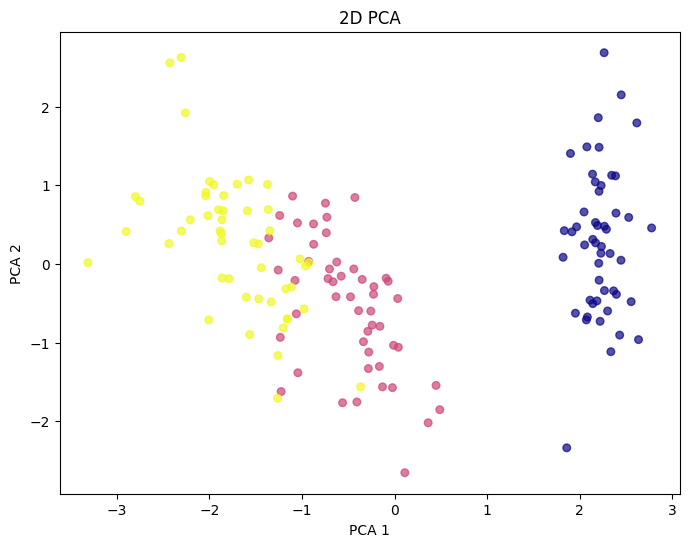

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='plasma', s=30, alpha=0.7)
plt.title("2D PCA")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()


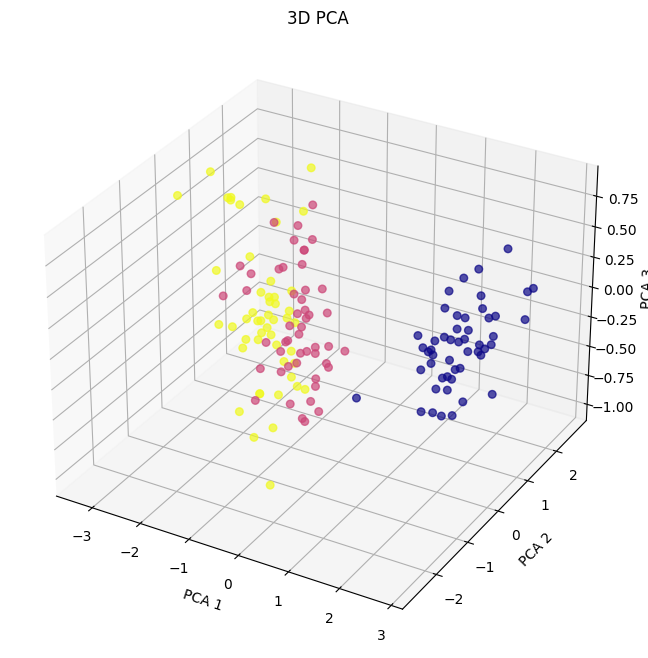

In [47]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y, cmap='plasma', s=30, alpha=0.7)
ax.set_title("3D PCA")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
plt.show()

# CODE BẰNG THƯ VIỆN SKLEARN

In [48]:
import sklearn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [49]:
# Chuẩn hóa dữ liệu
scaler = StandardScaler()
scaler = scaler.fit(X)
Xnew = scaler.transform(X)
# Thể hiện 10 mẫu dữ liệu đầu tiên sau khi chuẩn hóa
Xnew[:10]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ],
       [-0.53717756,  1.93979142, -1.16971425, -1.05217993],
       [-1.50652052,  0.78880759, -1.34022653, -1.18381211],
       [-1.02184904,  0.78880759, -1.2833891 , -1.3154443 ],
       [-1.74885626, -0.36217625, -1.34022653, -1.3154443 ],
       [-1.14301691,  0.09821729, -1.2833891 , -1.44707648]])

In [50]:
pca = PCA(n_components=3)

In [51]:
pca_sklearn = PCA(n_components=3)
X_pca_sklearn = pca_sklearn.fit_transform(Xnew)
# Thể hiện 10 mẫu dữ liệu đầu tiên sau khi PCA
X_pca_sklearn[:10]

array([[-2.26470281,  0.4800266 , -0.12770602],
       [-2.08096115, -0.67413356, -0.23460885],
       [-2.36422905, -0.34190802,  0.04420148],
       [-2.29938422, -0.59739451,  0.09129011],
       [-2.38984217,  0.64683538,  0.0157382 ],
       [-2.07563095,  1.48917752,  0.02696829],
       [-2.44402884,  0.0476442 ,  0.3354704 ],
       [-2.23284716,  0.22314807, -0.0886955 ],
       [-2.33464048, -1.11532768,  0.14507686],
       [-2.18432817, -0.46901356, -0.25376557]])

Nếu $\vec v$ là 1 vector riêng của ma trận A thì $-\vec v$ cùng là một vector riêng hợp lệ của ma trận A. Điều này giải thích cho việc đấu của cột 1 và 3 khi chạy sklearn khác với khi chạy MyPCA.